In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
df = pd.read_csv('./Quantization_Log_Random.csv')
df.head()

,model,dataset,batch_size,original_top1,subset_top1,all_top1,original_top5,subset_top5,all_top5,bits,...,subset_sparsity,all_sparsity,retain_rate,fusion,seed,similar,num_classes,subset_names,max_kl_dist,avg_kl_dist
0,resnet20,CIFAR100,256,0.623,0.610,0.609,0.880,0.878,0.874,4,...,0.2351,0.2346,0.25,False,0,[1],10,"['telephone', 'girl', 'spider', 'chair', 'trou...",60.526762,13.474301
1,resnet20,CIFAR100,256,0.608,0.605,0.611,0.864,0.871,0.869,4,...,0.2343,0.2382,0.25,False,0,[1],10,"['snail', 'lion', 'beetle', 'willow_tree', 'cl...",78.585145,17.110995
2,resnet20,CIFAR100,256,0.654,0.657,0.645,0.885,0.886,0.880,4,...,0.2349,0.2325,0.25,False,0,[1],10,"['keyboard', 'clock', 'mouse', 'sunflower', 'c...",60.611503,16.614717
3,resnet20,CIFAR100,256,0.575,0.583,0.569,0.853,0.846,0.854,4,...,0.2334,0.2331,0.25,False,0,[1],10,"['bridge', 'beetle', 'chimpanzee', 'willow_tre...",31.058063,10.604662
4,resnet20,CIFAR100,256,0.671,0.653,0.662,0.898,0.898,0.894,4,...,0.2357,0.2314,0.25,False,0,[1],10,"['boy', 'crocodile', 'chair', 'spider', 'flatf...",56.698347,10.293242


In [35]:
df = df[df['model'] == 'mobilenetv2_x0_75']

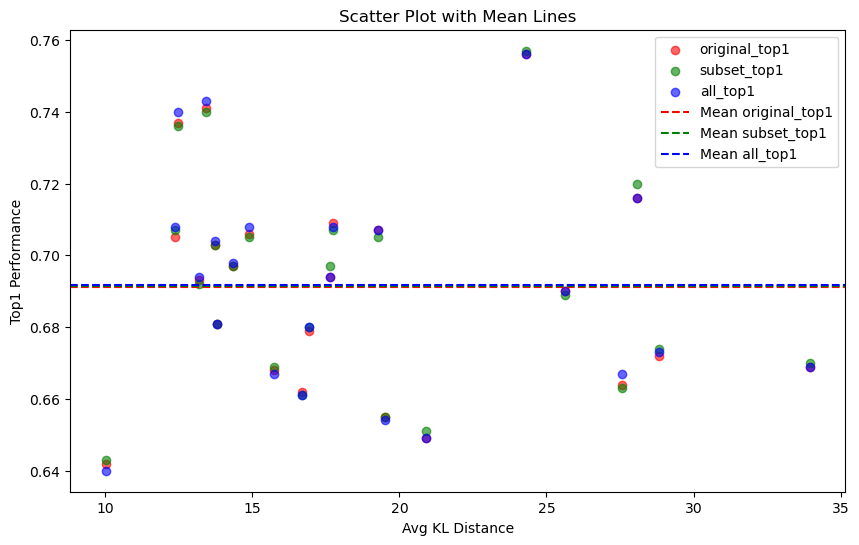

In [36]:
columns = ["original_top1", "subset_top1", "all_top1"]  # Update with actual column names
colors = ["red", "green", "blue"]

# Scatter plot
plt.figure(figsize=(10, 6))
for col, color in zip(columns, colors):
    plt.scatter(df['avg_kl_dist'], df[col], label=col, alpha=0.6, color=color)

# Plot mean lines
for col, color in zip(columns, colors):
    mean_value = df[col].mean()
    plt.axhline(mean_value, linestyle="--", color=color, label=f"Mean {col}")

# Customize plot
plt.xlabel("Avg KL Distance")
plt.ylabel("Top1 Performance")
plt.title("Scatter Plot with Mean Lines")
plt.legend()
save_folder = 'plots/mobilenetv2_x0_75/'
save_path = os.path.join(save_folder, "scatter_plot.png")  # Update filename if needed
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()  # Close the plot to free memory

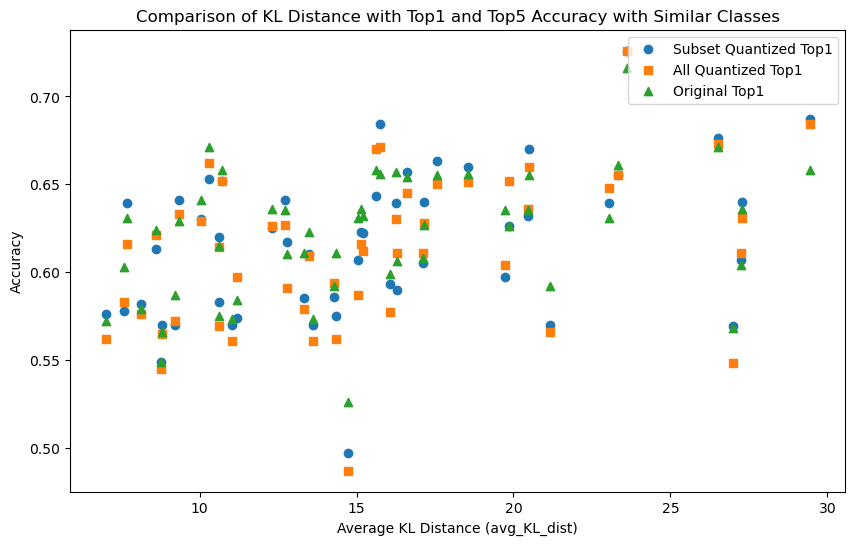

In [18]:
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(df['avg_kl_dist'], df['subset_top1'], label='Subset Quantized Top1', marker='o')
plt.scatter(df['avg_kl_dist'], df['all_top1'], label='All Quantized Top1', marker='s')
plt.scatter(df['avg_kl_dist'], df['original_top1'], label='Original Top1', marker='^')
# plt.scatter(sim_df['avg_kl_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Average KL Distance (avg_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Similar Classes')

# Add a legend
plt.legend()

# Show the plot
save_folder = 'plots/resnet20/'
save_path = os.path.join(save_folder, "scatter_plot.png")  # Update filename if needed
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()  # Close the plot to free memory

In [29]:
df = df[df['model']=='resnet20']

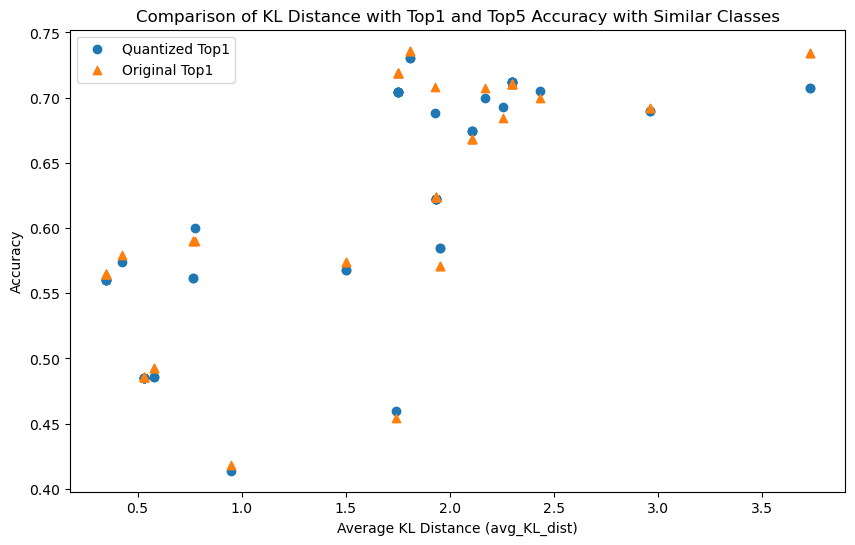

In [30]:
# Create a figure and axis
sim_df = df[df['similarity']==1]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['avg_kl_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
# plt.scatter(sim_df['avg_kl_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['avg_kl_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
# plt.scatter(sim_df['avg_kl_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Average KL Distance (avg_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Similar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

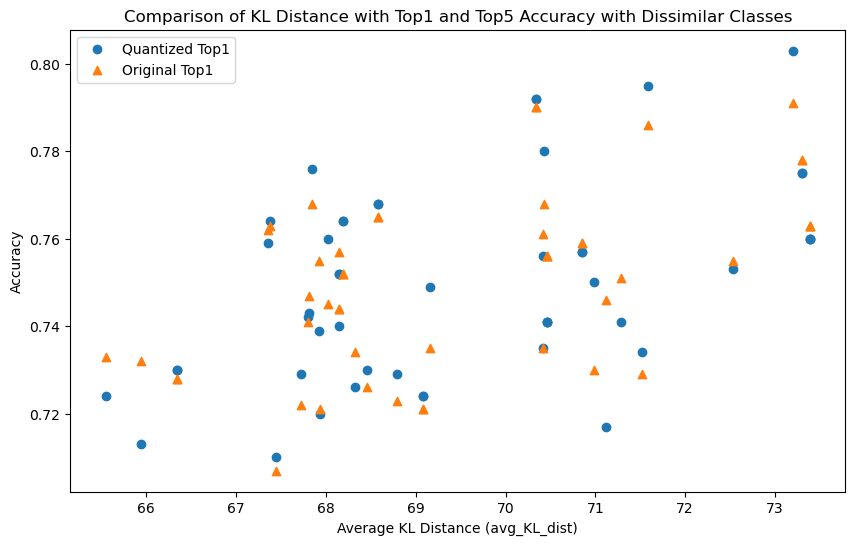

In [21]:
# Create a figure and axis
sim_df = df[df['similarity']==0]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['avg_kl_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
# plt.scatter(sim_df['avg_kl_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['avg_kl_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
# plt.scatter(sim_df['avg_kl_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Average KL Distance (avg_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Dissimilar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

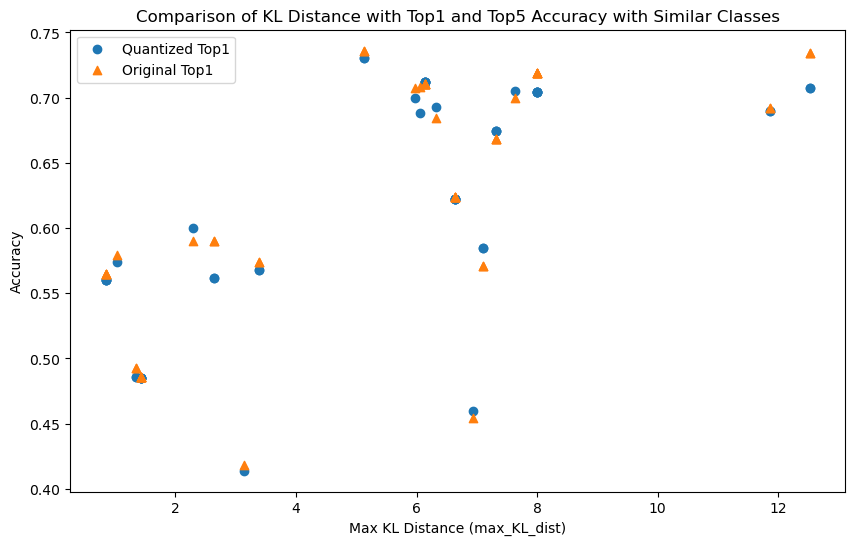

In [32]:
# Create a figure and axis
sim_df = df[df['similarity']==1]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['max_kl_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
# plt.scatter(sim_df['max_KL_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['max_kl_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
# plt.scatter(sim_df['max_KL_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Max KL Distance (max_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Similar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()

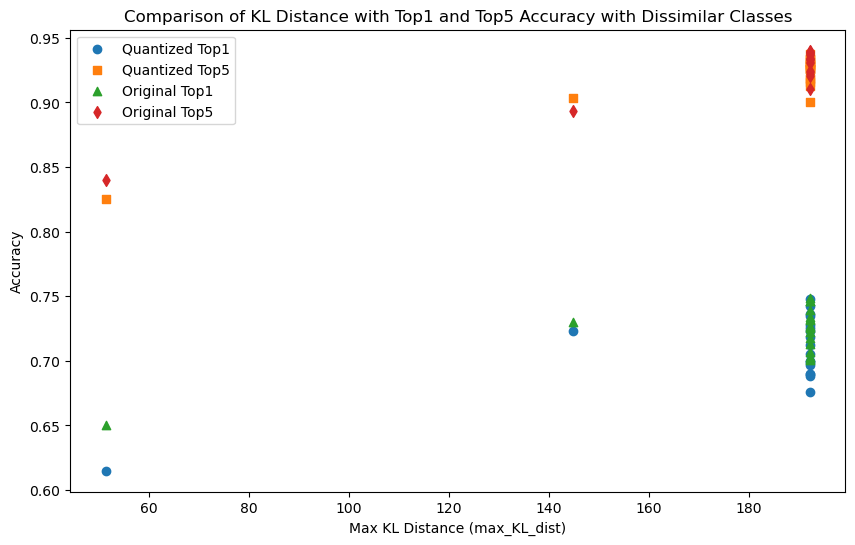

In [38]:
# Create a figure and axis
sim_df = df[df['similarity']==0]
plt.figure(figsize=(10, 6))

# Plot each pair against 'avg_KL_dist'
plt.scatter(sim_df['max_KL_dist'], sim_df['quantized_top1'], label='Quantized Top1', marker='o')
plt.scatter(sim_df['max_KL_dist'], sim_df['quantized_top5'], label='Quantized Top5', marker='s')
plt.scatter(sim_df['max_KL_dist'], sim_df['original_top1'], label='Original Top1', marker='^')
plt.scatter(sim_df['max_KL_dist'], sim_df['original_top5'], label='Original Top5', marker='d')

# Add labels and title
plt.xlabel('Max KL Distance (max_KL_dist)')
plt.ylabel('Accuracy')
plt.title('Comparison of KL Distance with Top1 and Top5 Accuracy with Dissimilar Classes')

# Add a legend
plt.legend()

# Show the plot
plt.show()